# Experimentando classificação com diferentes tipos de preprocessamento no calculo do LBP

> Utilizando o dataset de toras previamente cortadas

* com diferentes quantidades de pontos para o cálculo do LBP (4 e 8);
  * com diferentes formas de "Binarizar" com OTSU antes de ir para o LBP:
    * maior: pixel com valor maior que o threshold se torna 1;
    * menor: pixel com valor menor que o threshold se torna 0;
    * ambos;

## Importando bibliotecas

## Analisando desempenho com KNN

> Descomente _imports_ caso não tenha executado células superiores

In [1]:
# # importado de células anteriores
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn() # Deve ser chamada antes dos imports no sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

N_POINTS = [4, 8]
TARGET_NAMES = ['normal', 'broca', 'fissura', 'musgo'] # Já declarado anteriormente
FUNC_NAMES = ['ambos', 'menor', 'maior']

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)
seed_arr

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


array([6595, 6222, 2812, 5484, 6186, 1458,  927, 7583, 1394, 1395, 2424,
       3838, 5056, 2175, 5904,   88, 4876, 7948, 3768,  526,  451, 3667,
         51, 4153,  881, 4858,  404, 3975, 7376, 2443])

In [2]:
points_dict = {p:{'acuracias':[]} for p in N_POINTS}

for n_points in points_dict:
  X_list = []
  for name in FUNC_NAMES:
    points_dict[n_points][f'cm_{name}'] = []

    data = pd.read_csv(f'./csvs/prepro_5-{name}-P{n_points}.csv')
    target = data.pop('target').values
    X_list.append((data.values, target))

  for rodada, seed in enumerate(seed_arr):
    acc = [0, 0, 0]
    
    for i, (X, y) in enumerate(X_list):
      # separando dados
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

      # Instanciando classificador
      clf = KNeighborsClassifier().fit(X_train, y_train)

      acc[i] = clf.score(X_test, y_test)
      y_pred = clf.predict(X_test)
      points_dict[n_points][f'cm_{FUNC_NAMES[i]}'].append(confusion_matrix(y_test, y_pred, normalize='true'))

    points_dict[n_points]['acuracias'].append(acc)

       ambos     menor     maior
0   0.324074  0.388889  0.361111
1   0.305556  0.351852  0.407407
2   0.444444  0.416667  0.398148
3   0.268519  0.425926  0.287037
4   0.305556  0.361111  0.361111
5   0.398148  0.333333  0.333333
6   0.351852  0.416667  0.435185
7   0.333333  0.370370  0.425926
8   0.379630  0.444444  0.444444
9   0.333333  0.398148  0.314815
10  0.370370  0.435185  0.398148
11  0.379630  0.314815  0.361111
12  0.296296  0.379630  0.481481
13  0.425926  0.370370  0.370370
14  0.305556  0.351852  0.324074
15  0.361111  0.379630  0.398148
16  0.342593  0.453704  0.398148
17  0.268519  0.370370  0.398148
18  0.296296  0.296296  0.324074
19  0.342593  0.342593  0.379630
20  0.388889  0.361111  0.416667
21  0.342593  0.398148  0.379630
22  0.287037  0.425926  0.472222
23  0.388889  0.388889  0.444444
24  0.324074  0.324074  0.379630
25  0.277778  0.398148  0.398148
26  0.296296  0.407407  0.361111
27  0.379630  0.472222  0.462963
28  0.407407  0.351852  0.398148
29  0.3148

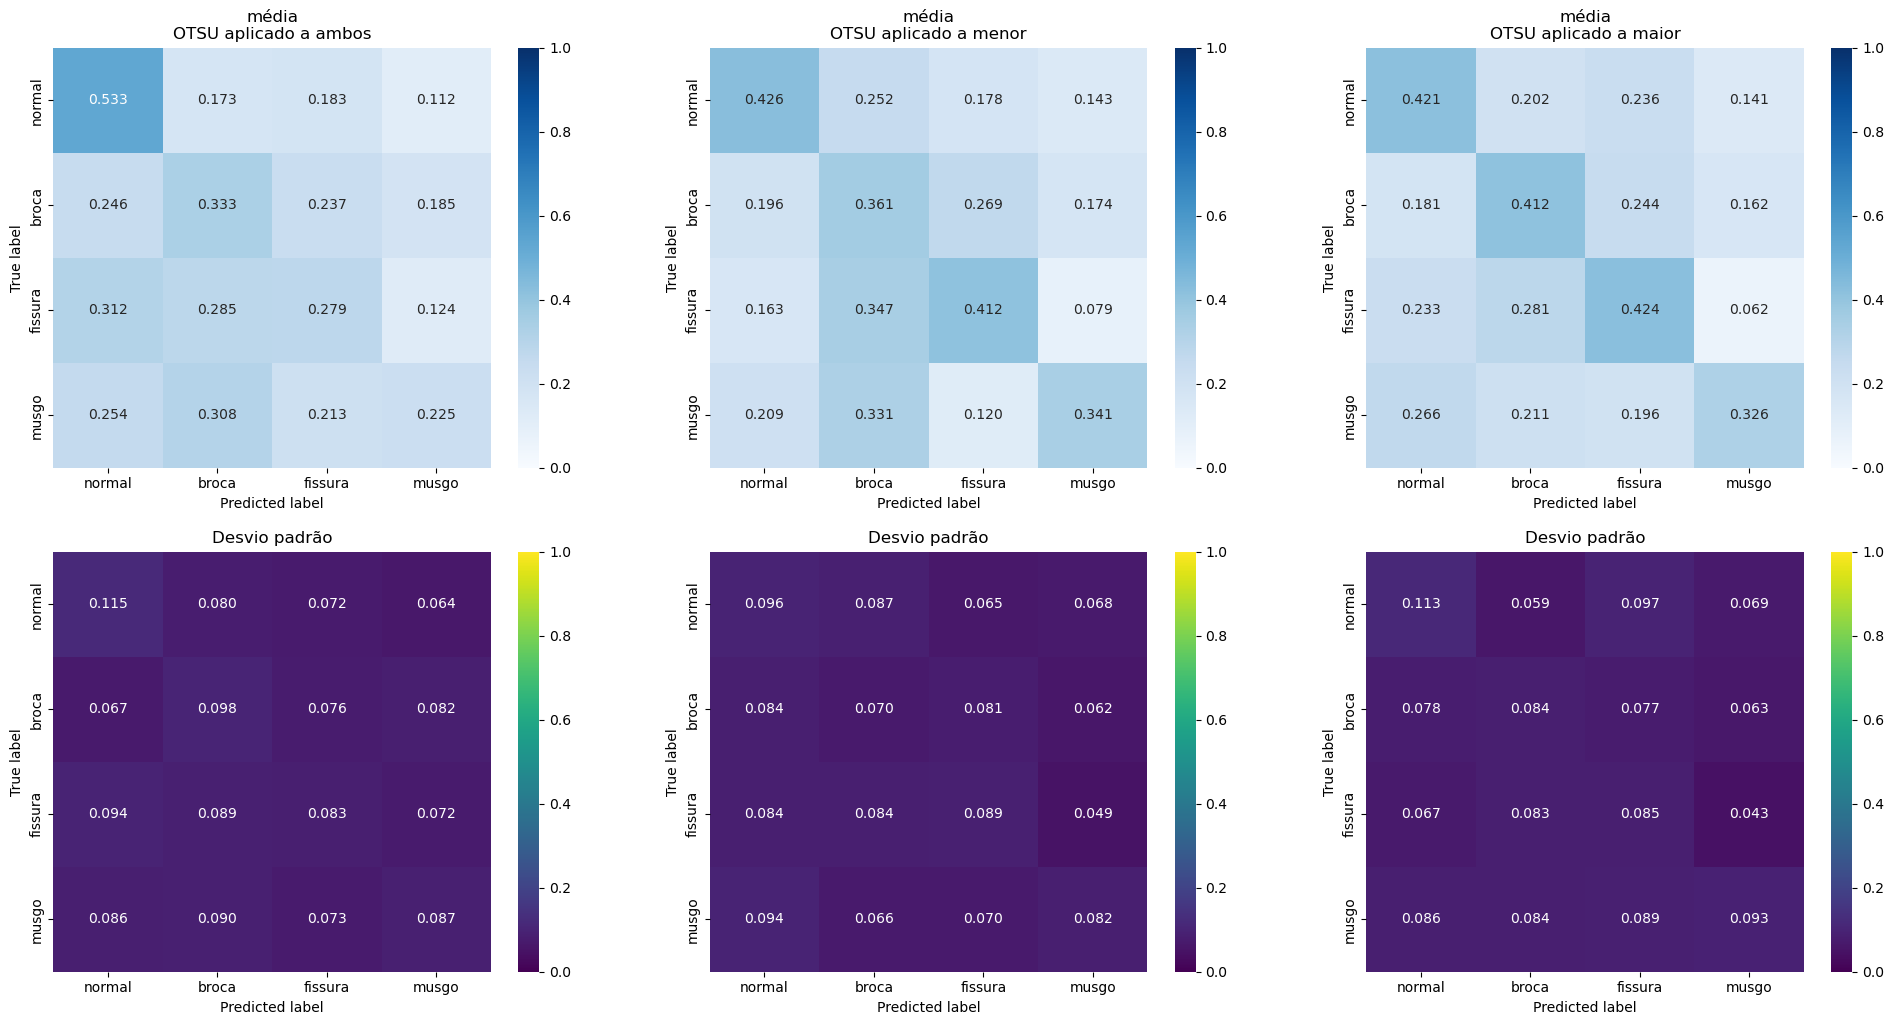

           ambos      menor      maior
count  30.000000  30.000000  30.000000
mean    0.341358   0.382099   0.391358
std     0.047196   0.042877   0.047209
min     0.268519   0.296296   0.287037
25%     0.305556   0.351852   0.361111
50%     0.337963   0.379630   0.398148
75%     0.379630   0.414352   0.423611
max     0.444444   0.472222   0.481481


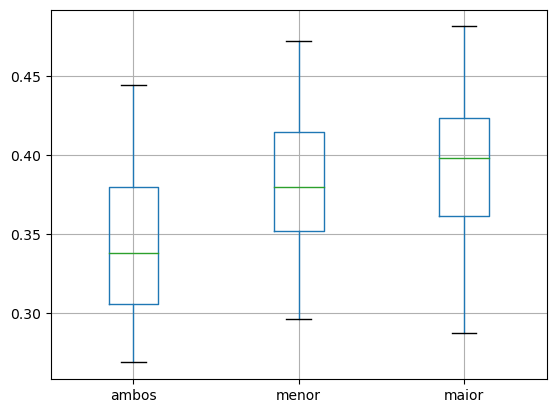

       ambos     menor     maior
0   0.379630  0.361111  0.388889
1   0.351852  0.379630  0.407407
2   0.370370  0.453704  0.435185
3   0.296296  0.435185  0.342593
4   0.305556  0.425926  0.407407
5   0.416667  0.342593  0.407407
6   0.342593  0.462963  0.453704
7   0.370370  0.425926  0.416667
8   0.342593  0.453704  0.444444
9   0.324074  0.398148  0.333333
10  0.361111  0.435185  0.425926
11  0.370370  0.361111  0.407407
12  0.361111  0.425926  0.444444
13  0.435185  0.370370  0.379630
14  0.342593  0.351852  0.342593
15  0.342593  0.407407  0.425926
16  0.388889  0.444444  0.453704
17  0.203704  0.370370  0.416667
18  0.351852  0.333333  0.351852
19  0.342593  0.398148  0.342593
20  0.361111  0.351852  0.388889
21  0.351852  0.425926  0.388889
22  0.324074  0.435185  0.444444
23  0.370370  0.407407  0.379630
24  0.296296  0.296296  0.361111
25  0.296296  0.388889  0.425926
26  0.305556  0.398148  0.361111
27  0.370370  0.398148  0.416667
28  0.342593  0.351852  0.435185
29  0.2777

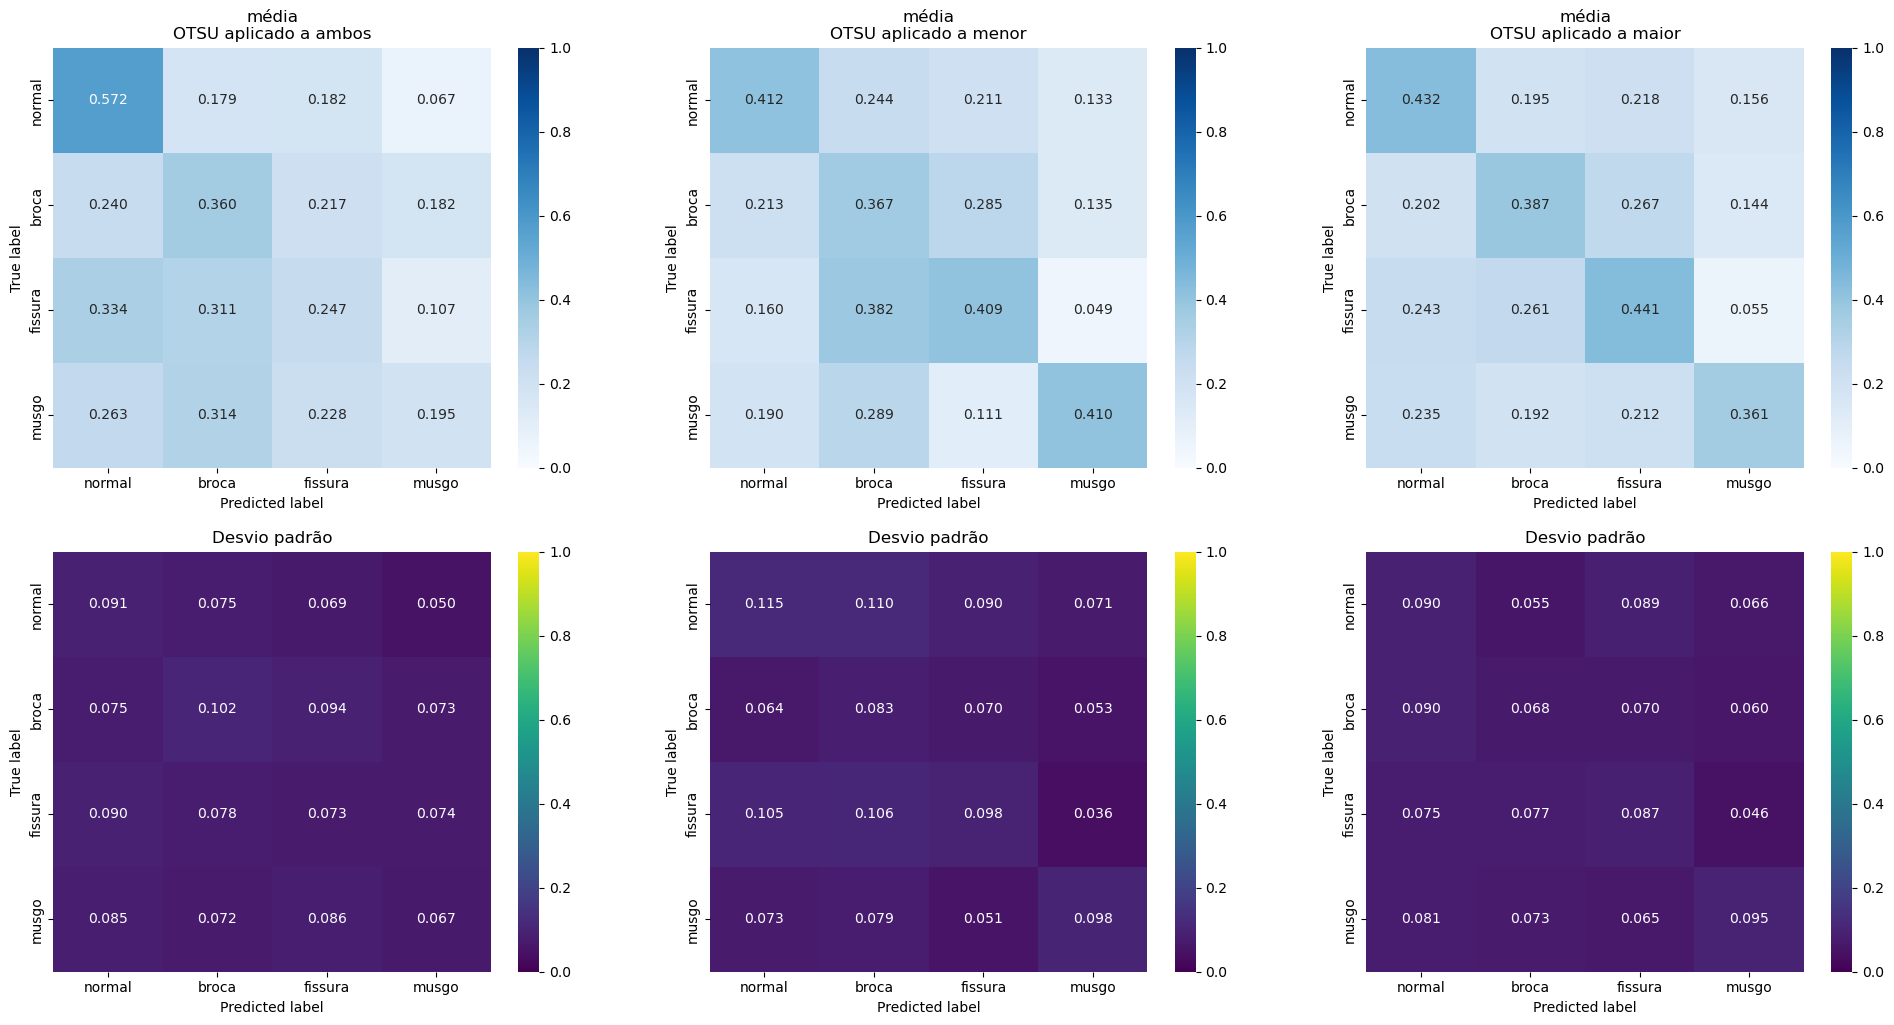

           ambos      menor      maior
count  30.000000  30.000000  30.000000
mean    0.343210   0.395062   0.400617
std     0.043966   0.041432   0.036306
min     0.203704   0.296296   0.333333
25%     0.324074   0.361111   0.379630
50%     0.347222   0.398148   0.407407
75%     0.370370   0.425926   0.425926
max     0.435185   0.462963   0.453704


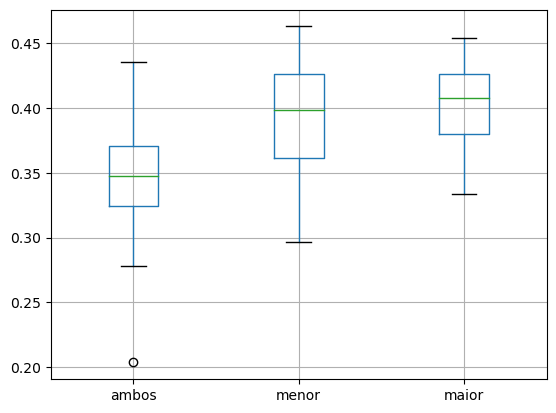

In [3]:
for n_points in points_dict:
  acc_df = pd.DataFrame(data=points_dict[n_points]['acuracias'],
                        columns=FUNC_NAMES)
  print(acc_df)

  print(f'Matrix de confusão a partir do dados do LBP com {n_points} pontos')
  fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))
  for i, name in enumerate(FUNC_NAMES):
    confusion_matrix_mean = np.mean(points_dict[n_points][f'cm_{name}'], axis=0)
    sns.heatmap(
      data=confusion_matrix_mean,
      cmap='Blues',
      vmin=0,
      vmax=1,
      annot=True,
      fmt='.3f',
      mask=confusion_matrix_mean == 0,
      xticklabels=TARGET_NAMES,
      yticklabels=TARGET_NAMES,
      ax=ax[0, i]
      ).set(
          title=f'média\nOTSU aplicado a {name}',
          xlabel='Predicted label',
          ylabel='True label')

    confusion_matrix_std = np.std(points_dict[n_points][f'cm_{name}'], axis=0)
    sns.heatmap(
      data=confusion_matrix_std,
      cmap='viridis',
      vmin=0,
      vmax=1,
      annot=True,
      fmt='.3f',
      mask=confusion_matrix_std == 0,
      xticklabels=TARGET_NAMES,
      yticklabels=TARGET_NAMES,
      ax=ax[1, i]
      ).set(
          title='Desvio padrão',
          xlabel='Predicted label',
          ylabel='True label')
  plt.show()

  print(acc_df.describe())
  acc_df.boxplot()
  plt.show()